In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [3]:
data_imgs = np.load('../Kanji-recognizer/data/kkanj-imgs.npz')
data_labels = np.load('../Kanji-recognizer/data/kkanji-labels.npz')

imgs = data_imgs['arr_0']
labels = data_labels['arr_0']

<Figure size 640x480 with 0 Axes>

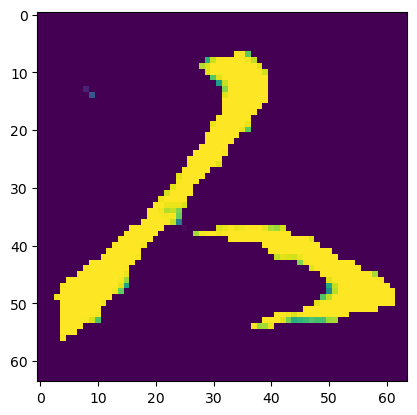

<Figure size 640x480 with 0 Axes>

In [4]:
img = imgs[15104]
img = np.asarray(img)
(contours, hierarchy) = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

There are 2 cards


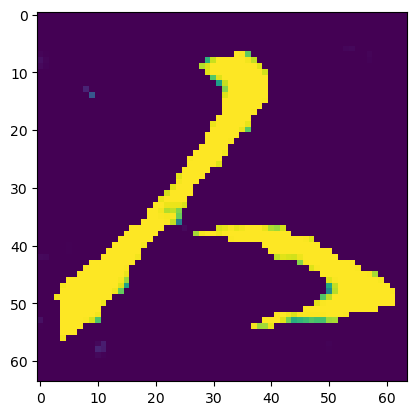

In [5]:
im2 = img.copy()
main_contours = []
count = 0
for c in contours:
    if cv2.contourArea(c) > 50:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)
        main_contours.append(c)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')

<Figure size 640x480 with 0 Axes>

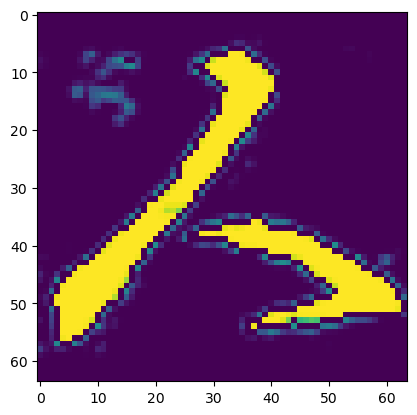

<Figure size 640x480 with 0 Axes>

In [20]:
im3 = img.copy()
ret, thresh = cv2.threshold(im3, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for c in contours:
    cv2.drawContours(im3, contours=[c], contourIdx=-1, color=(0,0,0),thickness=1)
plt.imshow(im3)
plt.figure()

There are 2 cards


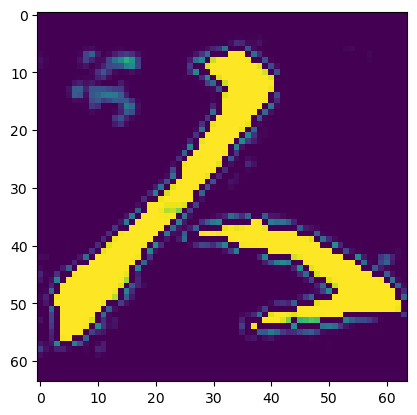

In [19]:
im4 = img.copy()
main_contours = []
count = 0
for c in contours:
    if cv2.contourArea(c) > 50:
        count+=1
        cv2.drawContours(im4, [c], -1, (0, 255, 0), 1)
        main_contours.append(c)

plt.imshow(im4, interpolation='none')
print(f'There are {count} cards')

In [30]:
def remove_by_contours(labels, images):
    full_count = 0
    image_contours = {}
    filtered_images = []
    filtered_labels = []
    label = labels[0]
    for i in range(0,len(images)):
        count = 0
        if label != labels[i]:
            full_count = full_count/len(image_contours)
            for k in image_contours.keys():
                if image_contours[k] > full_count-1 and image_contours[k] < full_count+1:
                    filtered_images.append(images[i])
                    filtered_labels.append(labels[i])
            full_count = 0
            image_contours = {}
        img = images[i]
        ret, thresh = cv2.threshold(img, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

        for c in contours:
            if cv2.contourArea(c) > 50:
                count+=1
                full_count+=1
        image_contours[i] = count
        label = labels[i]
    return filtered_labels, filtered_images
        

In [31]:
print(len(labels))
print(len(imgs))

filtered_labels, filtered_images = remove_by_contours(labels, imgs)
print(len(filtered_labels))
print(len(filtered_images))

140424
140424
125854
125854
